# LAB 11
### Name : Alok Kumar <br> Adm.No : 22MT0059

Create a MySQL Database. Load its data into working memory and perform Exploratory data analysis
and predictive analytics over it. Example: In the IMDB dataset (or any dataset at UCI Machine
Learning repository) produce descriptive graphs like number of movies by genre, budget etc. Perform
clustering on the dataset using k-means clustering, hierarchical clustering etc and analyse the
clusters. Perform classification using different classification algorithms and compare their results.

In [1]:
import requests
from bs4 import BeautifulSoup
import mysql.connector

url = "https://www.imdb.com/chart/top/"
response = requests.get(url)


In [2]:
cnx = mysql.connector.connect(user='ak', host='localhost', database='dbmslab')
cursor = cnx.cursor()

In [3]:
query = """
        create table if not exists movies
        (
            title varchar(50) primary key,
            year varchar(4),
            rating varchar(4),
            genre varchar(50),
            budget varchar(10)
        )
        """
cursor.execute(query)
cnx.commit()

In [4]:
soup = BeautifulSoup(response.content, "html.parser")
movies = soup.select("td.titleColumn")
ratings = soup.select("td.imdbRating ")

In [5]:
data = []
for i in range(len(movies)):
    title = movies[i].find("a").get_text()
    year = movies[i].find("span").get_text()[1:-1]
    rating = ratings[i].get_text().strip()
    data.append((title, year, rating))
data

[('The Shawshank Redemption', '1994', '9.2'),
 ('The Godfather', '1972', '9.2'),
 ('The Dark Knight', '2008', '9.0'),
 ('The Godfather Part II', '1974', '9.0'),
 ('12 Angry Men', '1957', '9.0'),
 ("Schindler's List", '1993', '8.9'),
 ('The Lord of the Rings: The Return of the King', '2003', '8.9'),
 ('Pulp Fiction', '1994', '8.8'),
 ('The Lord of the Rings: The Fellowship of the Ring', '2001', '8.8'),
 ('Il buono, il brutto, il cattivo', '1966', '8.8'),
 ('Forrest Gump', '1994', '8.8'),
 ('Fight Club', '1999', '8.7'),
 ('The Lord of the Rings: The Two Towers', '2002', '8.7'),
 ('Inception', '2010', '8.7'),
 ('The Empire Strikes Back', '1980', '8.7'),
 ('The Matrix', '1999', '8.7'),
 ('GoodFellas', '1990', '8.7'),
 ("One Flew Over the Cuckoo's Nest", '1975', '8.6'),
 ('Se7en', '1995', '8.6'),
 ("It's a Wonderful Life", '1946', '8.6'),
 ('Shichinin no samurai', '1954', '8.6'),
 ('The Silence of the Lambs', '1991', '8.6'),
 ('Saving Private Ryan', '1998', '8.6'),
 ('Cidade de Deus', '2002

In [6]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

plot_data = {'year': [],
             'rating':[]}

for i in range(len(data)):
    plot_data['year'].append(int(data[i][1]))
    plot_data['rating'].append(float(data[i][2]))

df = pd.DataFrame(plot_data)
df

,year,rating
0,1994,9.2
1,1972,9.2
2,2008,9.0
3,1974,9.0
4,1957,9.0
...,...,...
245,1999,8.0
246,2011,8.0
247,1992,8.0
248,1975,8.0


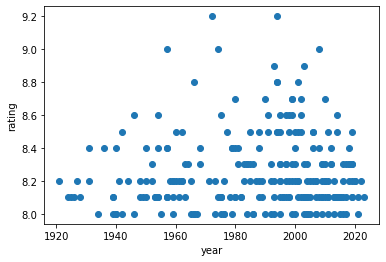

In [7]:
# Visualize the data
plt.scatter(df['year'], df['rating'])
plt.xlabel('year')
plt.ylabel('rating')
plt.show()


###  k-means clustering

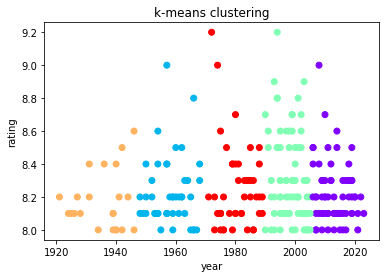

In [8]:
# Perform k-means clustering with k=5
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(df)

# Visualize the clusters
plt.scatter(df['year'], df['rating'], c=kmeans.labels_, cmap='rainbow')
plt.title('k-means clustering')
plt.xlabel('year')
plt.ylabel('rating')
plt.show()

### Hierarchical clustering 

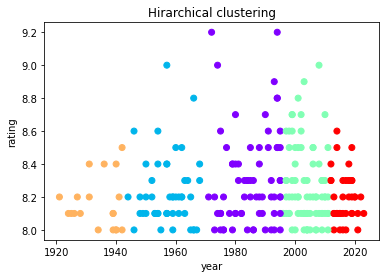

In [9]:
# Perform Hierarchical clustering with k=5
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters= 5)
clustering.fit(df)
# Visualize the clusters
plt.scatter(df['year'], df['rating'], c=clustering.labels_, cmap='rainbow')
plt.xlabel('year')
plt.ylabel('rating')
plt.title('Hirarchical clustering')
plt.show()